In [6]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 20  # number of hidden units
epochs = 20000
learnrate = 0.01

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


('Train loss: ', 0.22136960126703983)
('Train loss: ', 0.21572980818974924)
('Train loss: ', 0.21580462530668898, '  WARNING - Loss Increasing')
('Train loss: ', 0.21771850008318847, '  WARNING - Loss Increasing')
('Train loss: ', 0.21983457413684787, '  WARNING - Loss Increasing')
('Train loss: ', 0.22160771729062662, '  WARNING - Loss Increasing')
('Train loss: ', 0.2229490249754275, '  WARNING - Loss Increasing')
('Train loss: ', 0.22391769596149075, '  WARNING - Loss Increasing')
('Train loss: ', 0.22460317978084068, '  WARNING - Loss Increasing')
('Train loss: ', 0.2250865141076643, '  WARNING - Loss Increasing')
Prediction accuracy: 0.700


In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.display import HTML


table_names = ["binary.csv"]
tables = [pd.read_csv(file_name) for file_name in table_names]

for tbl in tables: display(tbl.head)



<bound method NDFrame.head of      admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
5        1  760  3.00     2
6        1  560  2.98     1
7        0  400  3.08     2
8        1  540  3.39     3
9        0  700  3.92     2
10       0  800  4.00     4
11       0  440  3.22     1
12       1  760  4.00     1
13       0  700  3.08     2
14       1  700  4.00     1
15       0  480  3.44     3
16       0  780  3.87     4
17       0  360  2.56     3
18       0  800  3.75     2
19       1  540  3.81     1
20       0  500  3.17     3
21       1  660  3.63     2
22       0  600  2.82     4
23       0  680  3.19     4
24       1  760  3.35     2
25       1  800  3.66     1
26       1  620  3.61     1
27       1  520  3.74     4
28       1  780  3.22     2
29       0  520  3.29     1
..     ...  ...   ...   ...
370      1  540  3.77     2
371      1  680  3.76     3
372      1  680  2

In [3]:
from pandas_summary import DataFrameSummary
for t in tables: display(DataFrameSummary(t).summary())

,admit,gre,gpa,rank
count,400,400,400,400
mean,0.3175,587.7,3.3899,2.485
std,0.466087,115.517,0.380567,0.94446
min,0,220,2.26,1
25%,0,520,3.13,2
50%,0,580,3.395,2
75%,1,660,3.67,3
max,1,800,4,4
counts,400,400,400,400
uniques,2,26,132,4


In [10]:
df = pd.DataFrame(tables[0])
len(df)
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [25]:
y = df[['admit']]
print(y[0:3])
#print(Y)
X = df[["gre","gpa","rank"]]
print (X[0:3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#check
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))



   admit
0      0
1      1
2      1
   gre   gpa  rank
0  380  3.61     3
1  660  3.67     3
2  800  4.00     1
320
80
320
80


In [27]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,y_train)
print (model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


/Users/dc/anaconda/envs/tf35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/dc/anaconda/envs/tf35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dc/anaconda/envs/tf35/lib/python3.5/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

In [28]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [31]:

from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 66.25%


In [38]:
import xgboost

xdata = xgboost.DMatrix(X_train, y_train)
xdata_val = xgboost.DMatrix(X_test, y_test)
xgb_parms = {'learning_rate': 0.1, 'subsample': 0.6, 
             'colsample_bylevel': 0.6, 'silent': True, 'objective': 'reg:linear'}
model = xgboost.train(xgb_parms,xdata)
model.eval(xdata_val)

b'[0]\teval-rmse:0.466404'

In [39]:
model.eval(xdata_val)

b'[0]\teval-rmse:0.466404'

{'gpa': 64, 'gre': 59, 'rank': 46}


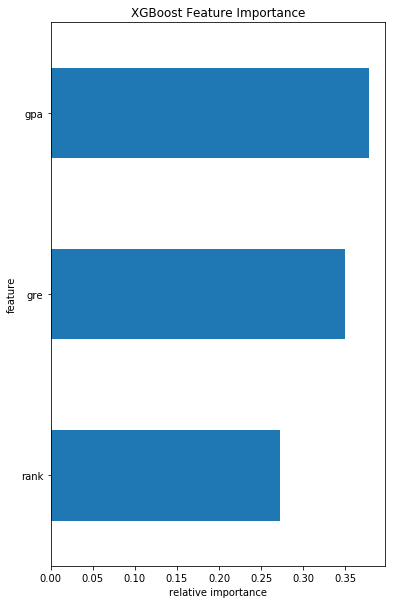

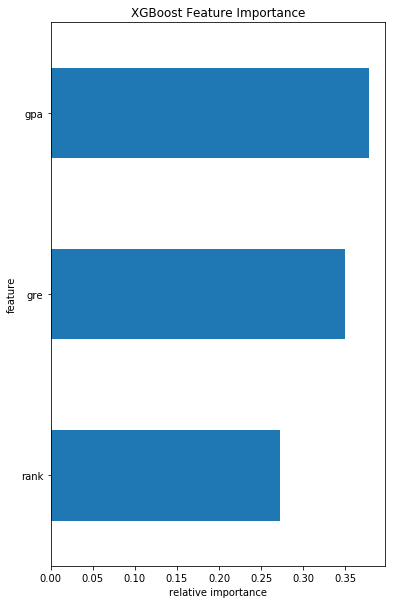

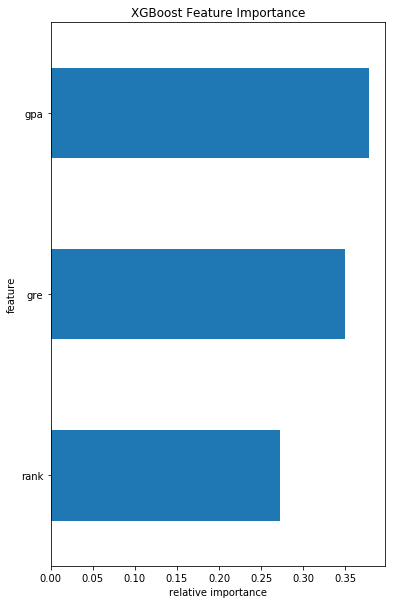

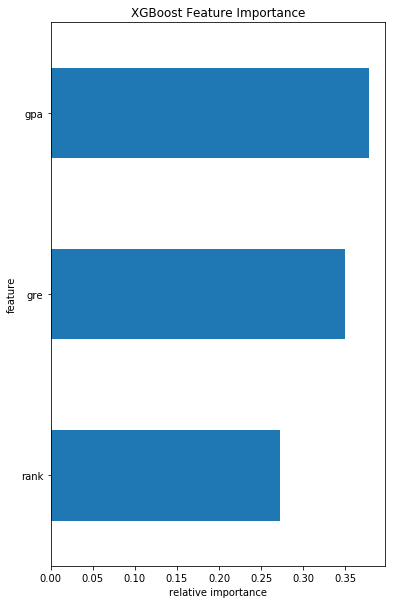

In [44]:
import matplotlib.pyplot as plt, xgboost, operator, random, pickle

importance = model.get_fscore()
print(importance)
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance');
plt.show()